In [1]:
# Load require libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import coo_matrix

In [2]:
df = pd.read_csv(r'D:\OneDrive\Desktop\Recommendetion system\marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.csv',sep='\t')
df.head(5)

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [3]:
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [4]:
# Extracting important column
dataset = df[['Uniq Id','Product Id','Product Rating','Product Reviews Count','Product Category','Product Brand','Product Name','Product Image Url','Product Description','Product Tags']]
dataset.head(1)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."


In [5]:
# Check null value
dataset.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                5000 non-null   object 
 1   Product Id             5000 non-null   object 
 2   Product Rating         2194 non-null   float64
 3   Product Reviews Count  3346 non-null   float64
 4   Product Category       4990 non-null   object 
 5   Product Brand          4987 non-null   object 
 6   Product Name           5000 non-null   object 
 7   Product Image Url      5000 non-null   object 
 8   Product Description    3873 non-null   object 
 9   Product Tags           5000 non-null   object 
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


In [7]:
dataset.columns

Index(['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count',
       'Product Category', 'Product Brand', 'Product Name',
       'Product Image Url', 'Product Description', 'Product Tags'],
      dtype='object')

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define the transformer
transformer = ColumnTransformer(
    transformers=[
        ('tf1', SimpleImputer(strategy='constant', fill_value=0), ['Product Rating', 'Product Reviews Count']),
        ('tf2', SimpleImputer(strategy='constant', fill_value=' '), ['Product Category', 'Product Brand', 'Product Description'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Apply the transformation
transformer_data = transformer.fit_transform(dataset)

# Get the column names in the original order
original_columns = dataset.columns

# Convert to DataFrame with original column order
dataset = pd.DataFrame(transformer_data, columns=transformer.get_feature_names_out())
dataset = dataset[original_columns]


In [9]:
dataset.head(1)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."


In [10]:
dataset.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [11]:
dataset.duplicated().sum()

0

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Uniq Id                5000 non-null   object
 1   Product Id             5000 non-null   object
 2   Product Rating         5000 non-null   object
 3   Product Reviews Count  5000 non-null   object
 4   Product Category       5000 non-null   object
 5   Product Brand          5000 non-null   object
 6   Product Name           5000 non-null   object
 7   Product Image Url      5000 non-null   object
 8   Product Description    5000 non-null   object
 9   Product Tags           5000 non-null   object
dtypes: object(10)
memory usage: 390.8+ KB


In [13]:
# make columns shorter
# Define the mapping of current column names to shorter names
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}
# Rename the columns using the mapping
dataset.rename(columns=column_name_mapping, inplace=True)

In [14]:
dataset['ID'] = dataset['ID'].str.extract(r'(\d+)').astype(float)
dataset['ProdID'] = dataset['ProdID'].str.extract(r'(\d+)').astype(float)

In [15]:
# Exploratory Data Analysis (EDA)

dataset.sample(2)

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
1831,6.0,51.0,0.0,1.0,Health > Superfoods & Cleanses > Detox Teas,Only Natural,Only Natural Dieters Tea Cleanse and Trim Oran...,https://i5.walmartimages.com/asr/29710b03-c251...,Gluten FreeNon-GMO Corn60 Calories Per CupVege...,Only Natural Dieter's Tea Cleanse and Trim Ora...
2507,5.0,4548270.0,0.0,105.0,Personal Care > Bath & Body > Body Lotions & C...,Eucerin,2 Pack - Eucerin Advanced Repair Dry Skin Loti...,https://i5.walmartimages.com/asr/44e2ec01-f6e6...,Pack of 2 for the UPC: 072140634827 Dermatolog...,2 Pack - Eucerin Advanced Repair Dry Skin Loti...


In [16]:
dataset.shape

(5000, 10)

In [17]:
unique_user = dataset['ID'].nunique()
unique_product = dataset['ProdID'].nunique()

print(f"Number of Users : {unique_user}")
print(f"Number of Unique Product : {unique_product}")


Number of Users : 1721
Number of Unique Product : 1697


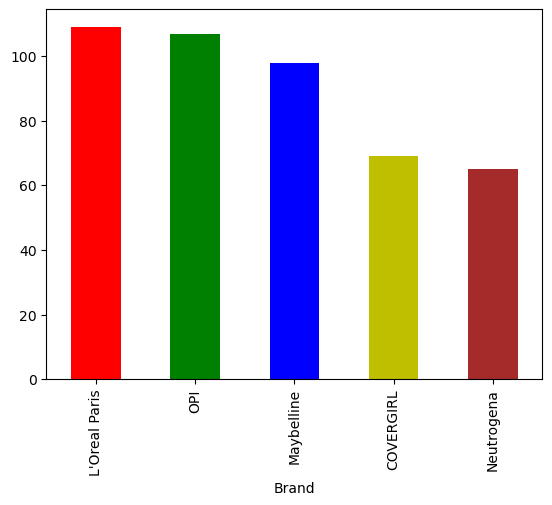

In [18]:
# Get the top 5 most common brands with highest product
dataset['Brand'].value_counts().head(5).plot(kind='bar',color=['r','g','b','y','brown'])
plt.show()

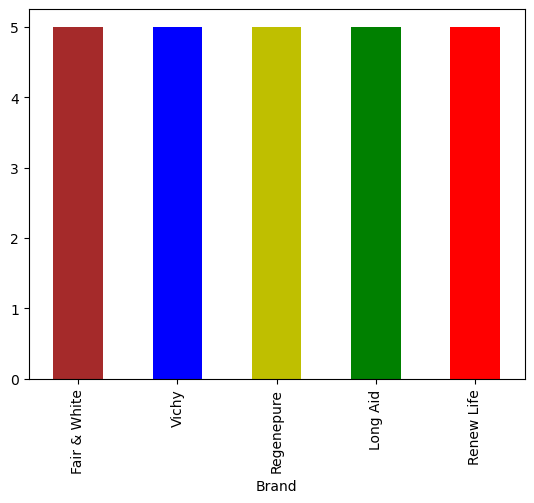

In [19]:
# Top 5 Rating Brand
dataset.groupby('Brand')['Rating'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color=['brown','b','y','g','r'])
plt.show()


<Axes: xlabel='Category'>

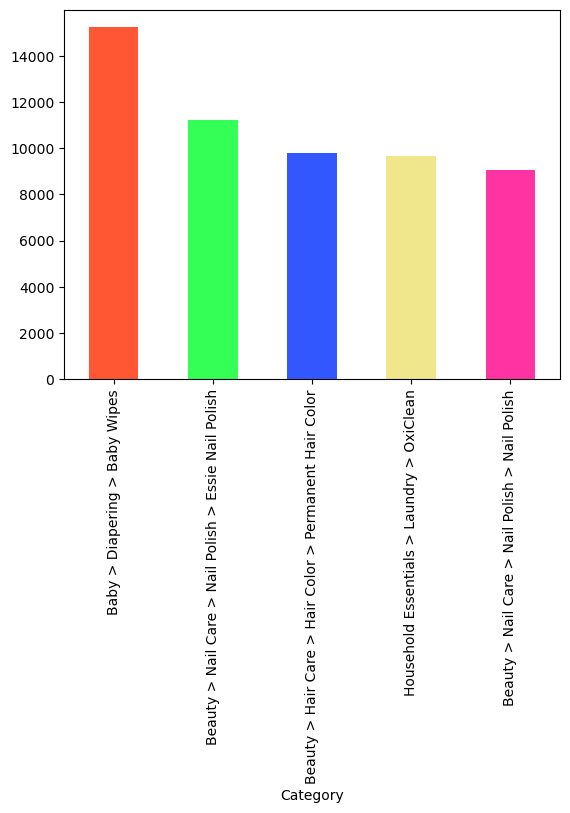

In [20]:
# Top Reviews on product
dataset.groupby('Category')['ReviewCount'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color= ['#FF5733', '#33FF57', '#3357FF', '#F0E68C', '#FF33A1'])

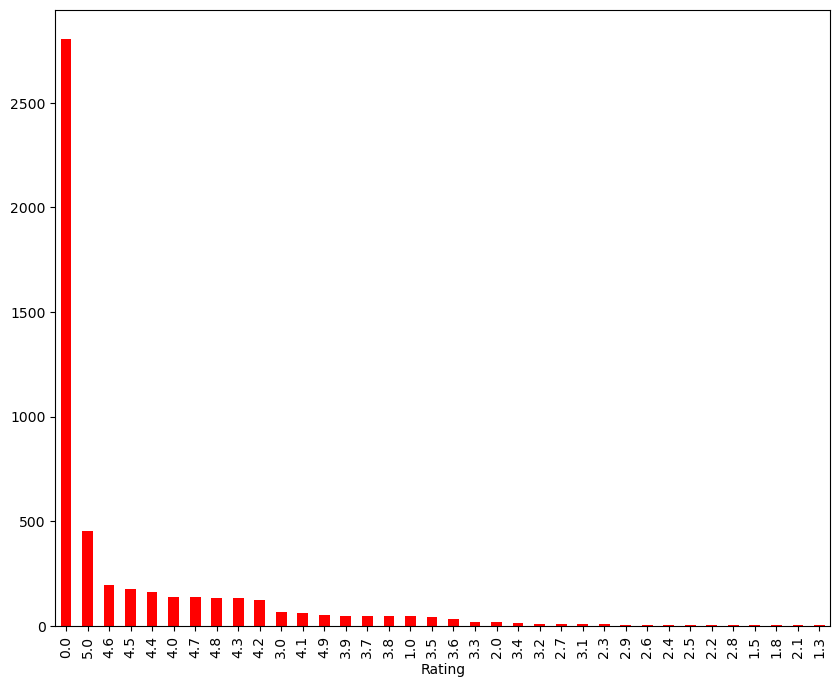

In [21]:
# most ratings by user 
plt.figure(figsize=(10,8))
dataset['Rating'].value_counts().plot(kind='bar',color='r')
plt.show()

In [22]:
# Text Preprocessing and Tags creations
dataset.sample(1)

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
1851,1.0,0.0,0.0,342.0,Health > Pain Relievers > Specialty Pain Relie...,Blue-Emu,"Blue-Emu Original Topical Cream, 4 Oz.",https://i5.walmartimages.com/asr/c9fdfeb9-f1a6...,Soothe tired joints and muscles with Blue Emu ...,"Blue-Emu Original Topical Cream, 4 Oz., Wal-ma..."


In [39]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import re

In [40]:
lemma = WordNetLemmatizer()

In [41]:

# Initialize the lemmatizer
lemma = WordNetLemmatizer()

def helper(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove unnecessary symbols
    clean_text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    
    # Tokenize into words
    clean_text = word_tokenize(clean_text)
    
    # Remove stopwords and apply lemmatization
    clean_text = [lemma.lemmatize(word, pos='v') for word in clean_text if word not in set(stopwords.words('english'))]
    
    # Join the list back into a single string
    clean_text = ','.join(clean_text)
    
    # Return the cleaned text
    return clean_text

# List of columns to apply the helper function on
columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

# Apply the helper function to each specified column
for column in columns_to_extract_tags_from:
    dataset[column] = dataset[column].apply(helper)


In [42]:
dataset['tags'] = dataset['Category'] + dataset['Brand'] + dataset['Description']

In [43]:
dataset['tags']

0       premiumbeautypremiummakeuppremiumnailpolishcar...
1       beautyhaircarehaircolorauburnhaircolorniceneas...
2       beautyhaircarehaircolorpermanenthaircolorclair...
3       beautymakeuplipkokiecosmeticscallmatteliplover...
4       seasonalstockessentialspersonalcarestockstocks...
                              ...                        
4995    householdessentialsairfreshenerssprayairfreshe...
4996    beautyhaircarehaircolorpermanenthaircolorgarni...
4997    beautymakeupnailstonewaymultifunctionalnaildri...
4998    premiumbeautypremiumbathbodypremiumbodywashsho...
4999    beautymakeupfacemakeupfacemakeupbrandcovergirl...
Name: tags, Length: 5000, dtype: object

In [44]:
# Rating base Recommendation systems 
top_rated_items = dataset.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index().sort_values(by='Rating',ascending=False)

In [45]:
top_rated_items[['Rating','ReviewCount']] = top_rated_items[['Rating','ReviewCount']].astype(int)

In [46]:
top_rated_items

,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2,goldbond,https://i5.walmartimages.com/asr/34b610e7-05db...,5
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5
...,...,...,...,...,...
2172,Herbal Clean Same-Day Premium Detox Drink 20oz...,0,herbalclean,https://i5.walmartimages.com/asr/5dbe0d57-ea2a...,0
2173,"Herbal Clean Same-Day Premium Detox Drink, 32o...",1,herbalclean,https://i5.walmartimages.com/asr/7510a9ff-ed21...,0
2174,Herbal Essences Bio:renew Vitamin E with Cocoa...,143,herbalessences,https://i5.walmartimages.com/asr/cd06460b-e7f0...,0
2175,Herbal Essences Color Me Happy Conditioner Aca...,231,herbalessences,https://i5.walmartimages.com/asr/54ca3569-c45d...,0


Content base recommendation system

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(dataset, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in dataset['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(dataset['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = dataset[dataset['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = dataset.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details

In [54]:
item_name = 'Bluebonnet Super Fruit Cranberry Fruit Extract, 120 Ct'
content_based_recommendations(dataset,item_name=item_name)

,Name,ReviewCount,Brand,ImageURL,Rating
620,Fruit of the Earth Vitamin-E Skin Care Cream 8 oz,9.0,fruitearth,https://i5.walmartimages.com/asr/e6e60e13-0007...,0.0
4977,Fruit of the Earth Aloe Vera 100% Gel 12 oz (P...,1.0,fruitearth,https://i5.walmartimages.com/asr/5a570fcc-0bd9...,5.0
3602,Glade PlugIns Scented Oil Refills Vanilla Pass...,0.0,glade,https://i5.walmartimages.com/asr/ab90a0c9-58ef...,0.0
3864,Glade PlugIns Scented Oil Refills Vanilla Pass...,0.0,glade,https://i5.walmartimages.com/asr/5b72da06-e4c2...,0.0
4602,3 Pack - Orajel Toddler Training Toothpaste Fr...,13.0,orajel,https://i5.walmartimages.com/asr/17c9ce4e-77d4...,4.7
3494,Fruit of the Earth Aloe Vera Gel Crystal Clear...,0.0,fruitearth,https://i5.walmartimages.com/asr/4c58604c-f9e7...,0.0
3210,XXTRA CLEAN 20 oz Tropical Fruit Herbal Cleans...,0.0,detoxify,https://i5.walmartimages.com/asr/aabb724d-958b...,0.0
831,"Gianna Rose Fruit-Shaped Soap in Leaf Dish, Lemon",0.0,giannarise,https://i5.walmartimages.com/asr/f8802e45-4b42...,0.0
3872,"Herbal Clean Same-Day Premium Detox Drink, 32o...",1.0,herbalclean,https://i5.walmartimages.com/asr/7510a9ff-ed21...,0.0
2413,Super Colon 1800 Weight Loss Detox Cleanse All...,0.0,maritzmayer,https://i5.walmartimages.com/asr/ac11c894-0064...,0.0


Collaborative Filtering

In [49]:
def collaborative_recommenedation(dataset,target_user_id,top=10):
    pivot_table = dataset.pivot_table(index='ID',columns='ProdID',values='Rating',aggfunc='mean').fillna(0).astype(int)
    user_similarity = cosine_similarity(pivot_table)
    target_user_index= pivot_table.index.get_loc(target_user_id)
    user_similarities = user_similarity[target_user_index]
    similar_user_index = user_similarities.argsort()[::-1][1:] 

    recommended_items = []

    for user_index in similar_user_index:
    # Get items rated by the similar user but not by the target user
        rated_by_similar_user = pivot_table.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (pivot_table.iloc[target_user_index] == 0)

    # Extract the item IDs of recommended items
        recommended_items.extend(pivot_table.columns[not_rated_by_target_user][:top])

    recommended_item_details = dataset[dataset['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']].head(top)  
    return recommended_item_details 


In [50]:
target_user_id = 10
top = 5
collaborative = collaborative_recommenedation(dataset,target_user_id,5)
print(f"Top {top} recommendations for user {target_user_id}")
collaborative

C:\Users\atanu\AppData\Local\Temp\ipykernel_9524\2284630931.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_table = dataset.pivot_table(index='ID',columns='ProdID',values='Rating',aggfunc='mean').fillna(0).astype(int)


Top 5 recommendations for user 10


,Name,ReviewCount,Brand,ImageURL,Rating
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,opi,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0.0
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,kokiecosmetics,https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
4,"Gillette TRAC II Plus Razor Blade Refills, Fit...",131.0,gillette,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,0.0
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
24,Hempz Milk & Honey Herbal Body Moisturizer 2.2...,7.0,hempz,https://i5.walmartimages.com/asr/83e236e5-392c...,0.0


Hybrid Recommendation system

In [51]:
def hybrid_recommendation(dataset,target_user_id,item_name,top=10):

    content_based_recommendation = content_based_recommendations(dataset,item_name,top)

    collaborative_recommendation = collaborative_recommenedation(dataset,target_user_id,top)


    hybrid_recommendation = pd.concat([content_based_recommendation,collaborative_recommendation]).drop_duplicates()

    return hybrid_recommendation.head(top)


In [52]:
target_user_id = 10
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'


hybrid_rec = hybrid_recommendation(dataset,target_user_id,item_name,10)
print(f"Top {top} hybrid recommendation of user id {target_user_id} and item name {item_name} : ")
hybrid_rec


C:\Users\atanu\AppData\Local\Temp\ipykernel_9524\2284630931.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_table = dataset.pivot_table(index='ID',columns='ProdID',values='Rating',aggfunc='mean').fillna(0).astype(int)


Top 5 hybrid recommendation of user id 10 and item name Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum : 


,Name,ReviewCount,Brand,ImageURL,Rating
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,blackradiance,https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
2496,"Black Radiance Perfect Tone Lip Color, Hollywo...",18.0,blackradiance,https://i5.walmartimages.com/asr/fe3da48f-5142...,4.3
2136,"Black Radiance Brilliant Effects Lip Gloss, Bl...",95.0,blackradiance,https://i5.walmartimages.com/asr/f6784519-2c86...,4.4
3140,Laura Mercier Tone Perfecting Eye Gel Crème 0....,11.0,lauramercier,https://i5.walmartimages.com/asr/9cd9aea3-5ac3...,3.7
398,"IMAN Skin Tone Evener BB Crème, Light Sand",19.0,imancosmetics,https://i5.walmartimages.com/asr/b387123b-700d...,3.9
3885,Two-Tone Comfort Yoga Mat,0.0,edx,https://i5.walmartimages.com/asr/75ebb9e7-07eb...,0.0
4589,"Revlon ColorStay Longwear Lip Liner, 665 Plum,...",1678.0,revlon,https://i5.walmartimages.com/asr/075c59a0-3a35...,0.0
725,"LOreal Paris Colour Riche Lip Liner, Lasting P...",85.0,lorealparis,https://i5.walmartimages.com/asr/194b6bcc-6cd6...,4.4
680,Revlon Revlon Super Lustrous Lipstick with Vit...,2031.0,revlon,https://i5.walmartimages.com/asr/f21188e6-b3ef...,4.4
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,lorealparis,https://i5.walmartimages.com/asr/baf97085-7231...,4.4


In [53]:
dataset['Name'][100]

'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'